In [25]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/mineracaoDados/'

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [0]:
data_sd = pd.read_csv(base_dir + 'seeds_dataset.txt', sep='\t' , lineterminator='\n')
data_sd1 = data_sd.drop('Class', axis=1)


In [50]:
data_sd1

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [54]:
normalized_X = preprocessing.normalize(data_sd1)
normalized_X

array([[0.66271789, 0.64447795, 0.03782617, ..., 0.14383497, 0.09645455,
        0.22669642],
       [0.66410726, 0.65027169, 0.03932425, ..., 0.14875467, 0.04543422,
        0.22119056],
       [0.65688362, 0.64769001, 0.0416011 , ..., 0.15339543, 0.1240678 ,
        0.2217959 ],
       ...,
       [0.59378277, 0.6144752 , 0.03995888, ..., 0.14538681, 0.37403816,
        0.22743679],
       [0.60059997, 0.67009507, 0.04322392, ..., 0.14385993, 0.1825134 ,
        0.25586371],
       [0.59752179, 0.64804396, 0.04218601, ..., 0.14447397, 0.27383987,
        0.24595552]])

In [52]:
data_sd1.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [0]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

In [0]:
pairwise_top =squareform(pdist(normalized_X))

In [57]:
pairwise_top

array([[0.        , 0.05197197, 0.03140658, ..., 0.2879753 , 0.11380008,
        0.19010176],
       [0.05197197, 0.        , 0.07931529, ..., 0.33824644, 0.15707401,
        0.23936176],
       [0.03140658, 0.07931529, 0.        , ..., 0.26024567, 0.09333849,
        0.16355763],
       ...,
       [0.2879753 , 0.33824644, 0.26024567, ..., 0.        , 0.20339742,
        0.10907158],
       [0.11380008, 0.15707401, 0.09333849, ..., 0.20339742, 0.        ,
        0.09485177],
       [0.19010176, 0.23936176, 0.16355763, ..., 0.10907158, 0.09485177,
        0.        ]])

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

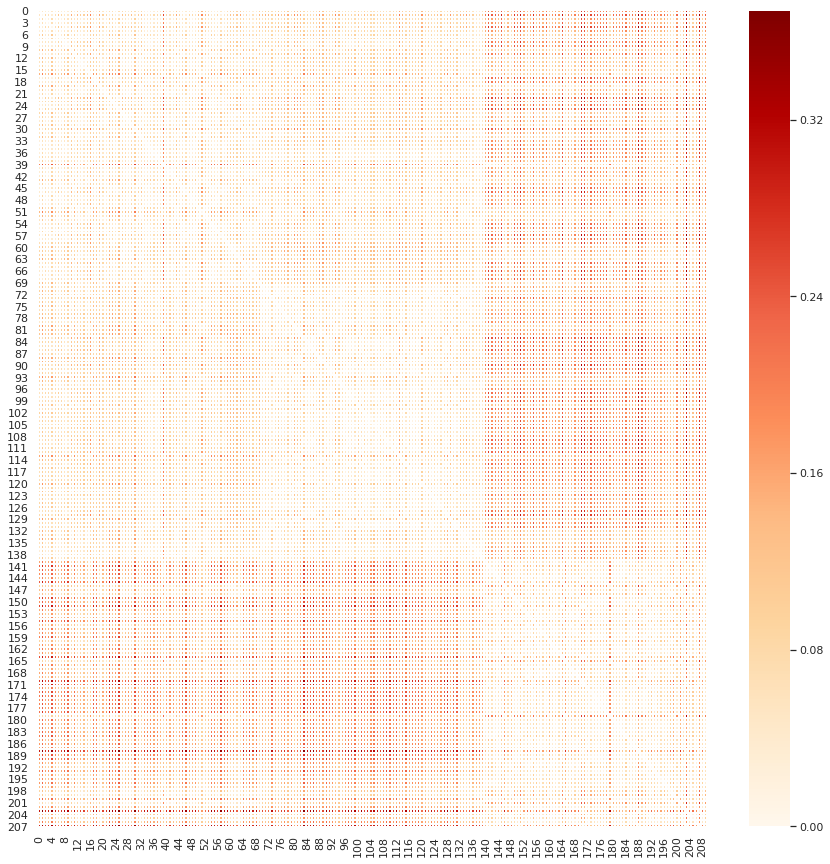

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(
    pairwise_top,
    cmap='OrRd',
    linewidth=1
)

In [0]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [0]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(normalized_X)

In [0]:
distances, indices = nbrs.kneighbors(normalized_X)

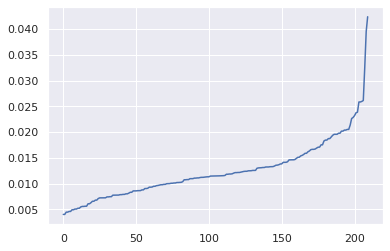

In [63]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [64]:
distances

array([0.00402123, 0.00402123, 0.00446442, 0.00446442, 0.00459575,
       0.00459575, 0.00492242, 0.00492242, 0.00506154, 0.00506154,
       0.00521628, 0.00521628, 0.00547451, 0.00557115, 0.00557115,
       0.00561231, 0.00561231, 0.0060867 , 0.0060867 , 0.00629858,
       0.00657169, 0.00657169, 0.00679469, 0.00679469, 0.00710303,
       0.00723008, 0.00723008, 0.00723633, 0.00723633, 0.00724245,
       0.00742055, 0.00742055, 0.00746188, 0.00746188, 0.00775361,
       0.00776218, 0.00776218, 0.00777359, 0.00777359, 0.00785568,
       0.00785568, 0.00790652, 0.00790652, 0.00801578, 0.00801578,
       0.00814981, 0.00831607, 0.00831607, 0.00858329, 0.00858682,
       0.00858682, 0.00862558, 0.00862558, 0.00864124, 0.00878197,
       0.00878197, 0.00904409, 0.00904409, 0.00909333, 0.00930624,
       0.00930624, 0.00933653, 0.00947915, 0.00947915, 0.00960427,
       0.00963419, 0.00969668, 0.00977729, 0.00977729, 0.00985072,
       0.00985072, 0.00998289, 0.00998289, 0.01000246, 0.01007